# Лесной пожар

Правила:
- Есть полу n на n клеток
- Каждый ход на на клетке выростает дерево с вероятностью p (если на клетке уже было дерево, ничего не происхожит)
- В конце хода молния бьет в клетку с вероятностью 1 -p
- Если в соседней клетке от дерева горит дерево, то жерево в этой клетке тоже сгорает

In [1]:
interactive = False

In [2]:
if interactive:
    %matplotlib
    #widget
    import matplotlib
    matplotlib.use('TkAgg')

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import trange, tqdm

In [4]:
class ForestFireGame:
    def __init__(self, n, p, max_iter=1000, interactive=False, random_state=42):
        self.n = n
        self.p = p
        self.q = 1 - p
        self.random_state = random_state
        self.field = np.zeros((n, n))
        self.population = []
        self.max_iter=max_iter
        self.interactive = interactive
        self.burnt = False

    def _fire(self, x, y):
        if x < 0 or x >= self.n or y < 0 or y >= self.n:
            return

        if self.field[x][y] == 1:
            self.field[x][y] = 0
            self._fire(x-1, y)
            self._fire(x+1, y)
            self._fire(x, y-1)
            self._fire(x, y+1)
            # self._fire(x+1, y+1)
            # self._fire(x+1, y-1)
            # self._fire(x-1, y+1)
            # self._fire(x-1, y-1)

    def _lightning_strike(self):
        for index_array in np.random.randint(self.n, size=(round(self.n ** 2 * self.q), 2)):
            self._fire(index_array[0], index_array[1])

    def _grow_trees(self):
        for index_array in np.random.randint(self.n, size=(round(self.n ** 2 * self.p), 2)):
            self.field[index_array[0]][index_array[1]] = 1

    def _get_current_trees_count(self):
        return np.sum(self.field)

    def _simulate_step(self):
        self._grow_trees()
        self._lightning_strike()
        self.population.append(self._get_current_trees_count())


    def simulate(self):
        np.random.seed = self.random_state
        if self.interactive:
            plt.ion()
            fig, ax = plt.subplots()
            line, = ax.plot([], [])

            ax.set_xlabel("Iteration")
            ax.set_ylabel("Trees count")

        for _ in trange(self.max_iter, leave=False):
            self._simulate_step()

            if self.interactive:
                line.set_ydata(self.population)
                line.set_xdata(range(len(self.population)))

                ax.relim()
                ax.autoscale_view()

                fig.canvas.draw()
                fig.canvas.flush_events()


            if self.population[len(self.population)-1] <= 0:
                print('All trees are gone')
                self.burnt = True
                break

        plt.ioff()


In [5]:
max_iter = 100
n = 100

## Построим график популяции в зависимости от итерации для p = 0.2, 0.5, 0.8

  0%|          | 0/100 [00:00<?, ?it/s]

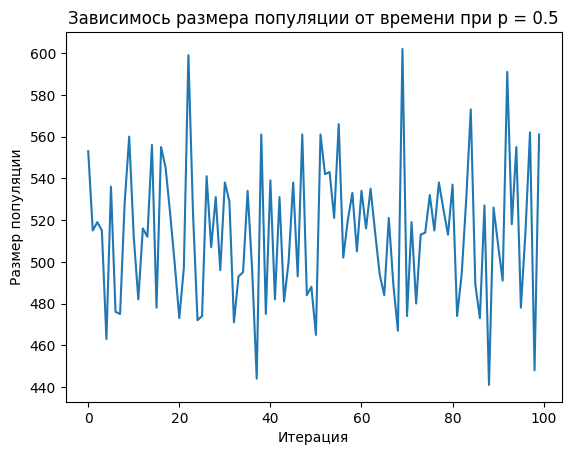

In [6]:
p = 0.5

game = ForestFireGame(n, p, max_iter=max_iter, interactive=interactive)
game.simulate()

if not interactive:
    plt.plot(game.population)
    plt.title(f'Зависимось размера популяции от времени при p = {p}')
    plt.xlabel('Итерация')
    plt.ylabel('Размер популяции')
    plt.show()

  0%|          | 0/100 [00:00<?, ?it/s]

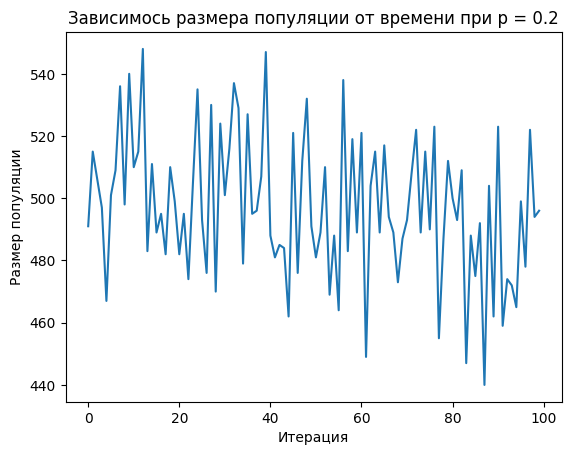

In [7]:
p= 0.2

game = ForestFireGame(n, p, max_iter=max_iter, interactive=interactive)
game.simulate()

if not interactive:
    plt.plot(game.population)
    plt.title(f'Зависимось размера популяции от времени при p = {p}')
    plt.xlabel('Итерация')
    plt.ylabel('Размер популяции')
    plt.show()

  0%|          | 0/100 [00:00<?, ?it/s]

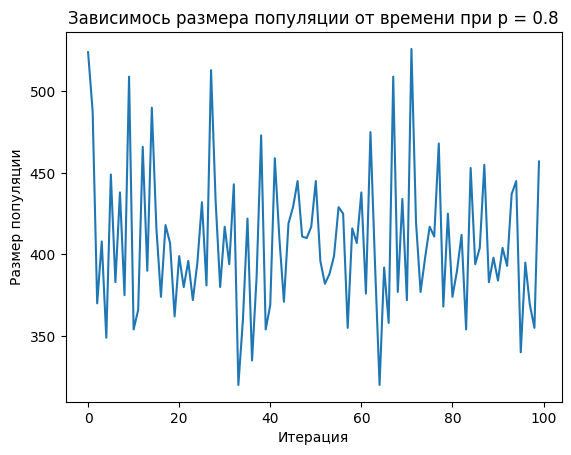

In [8]:
p = 0.8

game = ForestFireGame(n, p, max_iter=max_iter, interactive=interactive)
game.simulate()

if not interactive:
    plt.plot(game.population)
    plt.title(f'Зависимось размера популяции от времени при p = {p}')
    plt.xlabel('Итерация')
    plt.ylabel('Размер популяции')
    plt.show()

## Построим график зависимости среднего размера популяции от p 

In [15]:
import sys
sys.setrecursionlimit(1000000)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

All trees are gone


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

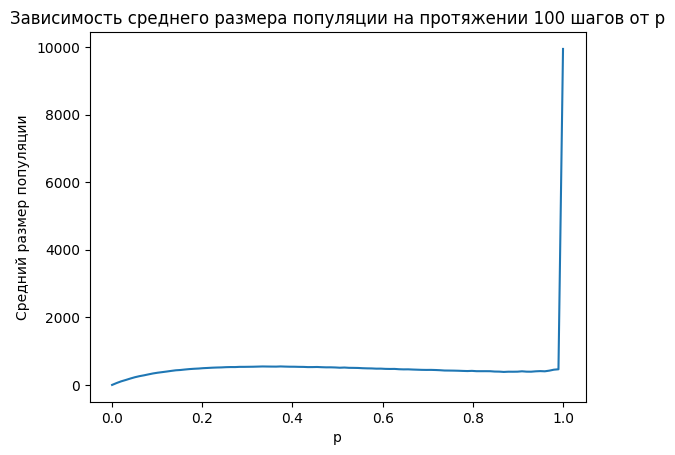

In [16]:
avg_population = []
probabilities = np.linspace(0, 1, 100)
for p in tqdm(probabilities, leave=False):
    game = ForestFireGame(n, p, max_iter=max_iter, interactive=False)
    game.simulate()

    if game.burnt:
        avg_population.append(0)
    else:
        avg_population.append(np.average(game.population))

plt.plot(probabilities, avg_population)
plt.title(f'Зависимость среднего размера популяции на протяжении {n} шагов от p')
plt.xlabel('p')
plt.ylabel('Средний размер популяции')
plt.show()


При $y\rightarrow1$ $\alpha\rightarrow n^2$, чтобы убать этот выброс рассмотрим промежуток p от 0 до 0.9 

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

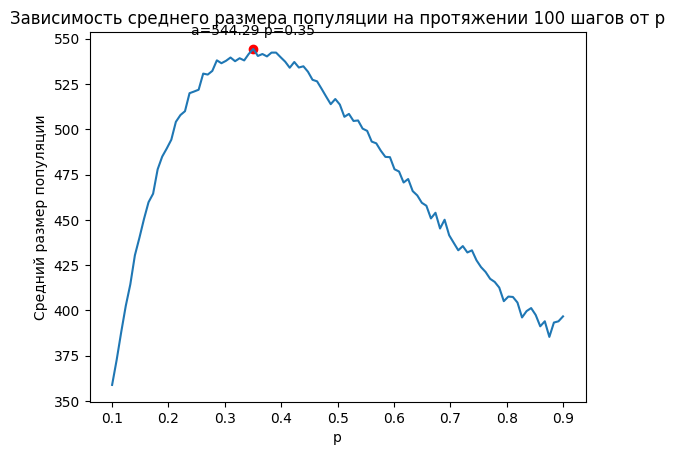

In [19]:
avg_population = []
probabilities = np.linspace(0.1, 0.9, 100)
for p in tqdm(probabilities, leave=False):
    game = ForestFireGame(n, p, max_iter=max_iter, interactive=False)
    game.simulate()

    if game.burnt:
        avg_population.append(0)
    else:
        avg_population.append(np.average(game.population))

plt.plot(probabilities, avg_population)
plt.title(f'Зависимость среднего размера популяции на протяжении {n} шагов от p')
plt.xlabel('p')
plt.ylabel('Средний размер популяции')

y_max = max(avg_population)
x_max = probabilities[next(i for i, y in enumerate(avg_population) if y == y_max )]
plt.scatter(x_max, y_max, color='red')
plt.annotate(f'a={y_max:.2f} p={x_max:.2f}', (x_max, y_max), textcoords="offset points", xytext=(0,10), ha='center')
plt.show()


Визуально распределение похоже на распредиление Вейбулл, проверим это тестом Колмагорова-Смирнова

In [23]:
from scipy import stats

In [30]:
dist = stats.weibull_min

params = dist.fit(avg_population)
ks_stat, p_value = stats.kstest(avg_population, dist.cdf, args=params) 
print(f'KS Statistic: {ks_stat}, p: {p_value}')
print(f'params: {params}')

KS Statistic: 0.7993277303377999, p: 3.0879140376616815e-69
params: (0.185755969710526, 358.90999999999997, 1.4705158791438855)


значение p очень мало из-за чего можно сделать вывод, что распреление мы угадали

Таким образом, при стремлении p к 1 получается максимальная популяция, но, если обрезать этот выброс максимальный средний размер популяции постигается при p = 0.35